# Getting Started

## Description


1.   `/content/mydrive/MyDrive/`에 LTSF-Linear라는 폴더를 생성하고 [Github](https://github.com/cure-lab/LTSF-Linear)에서 다운로드 받은 zip파일을 압축을 풀고 업로드 했습니다.
2. README.md의 Getting Started를 다음과 같이 따라해봤습니다:





## Environment Requirements

### Install Conda
- [reference](https://inside-machinelearning.com/en/how-to-install-use-conda-on-google-colab/)

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda create -n LTSF_Linear python=3.6.9
!conda activate LTSF_Linear
!conda init

✨🍰✨ Everything looks OK!
Solving environment: - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/LTSF_Linear

  added / updated specs:
    - python=3.6.9


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge None
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu None
  ca-certificates    conda-forge/linux-64

### Install Environment

```
conda create -n LTSF_Linear python=3.6.9
conda activate LTSF_Linear
pip install -r requirements.txt
```

In [2]:
from google.colab import drive
drive.mount('/content/mydrive/')
%cd /content/mydrive/MyDrive/LTSF_Linear
!pip install -r requirements.txt 

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).
/content/mydrive/MyDrive/LTSF_Linear
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Preparation
Obtain all benchmarks from [Google Drive](https://drive.google.com/drive/folders/1ZOYpTUa82_jCcxIdTmyr0LXQfvaM9vIy). 



```
mkdir dataset
```

Put them in the `./dataset` directory.



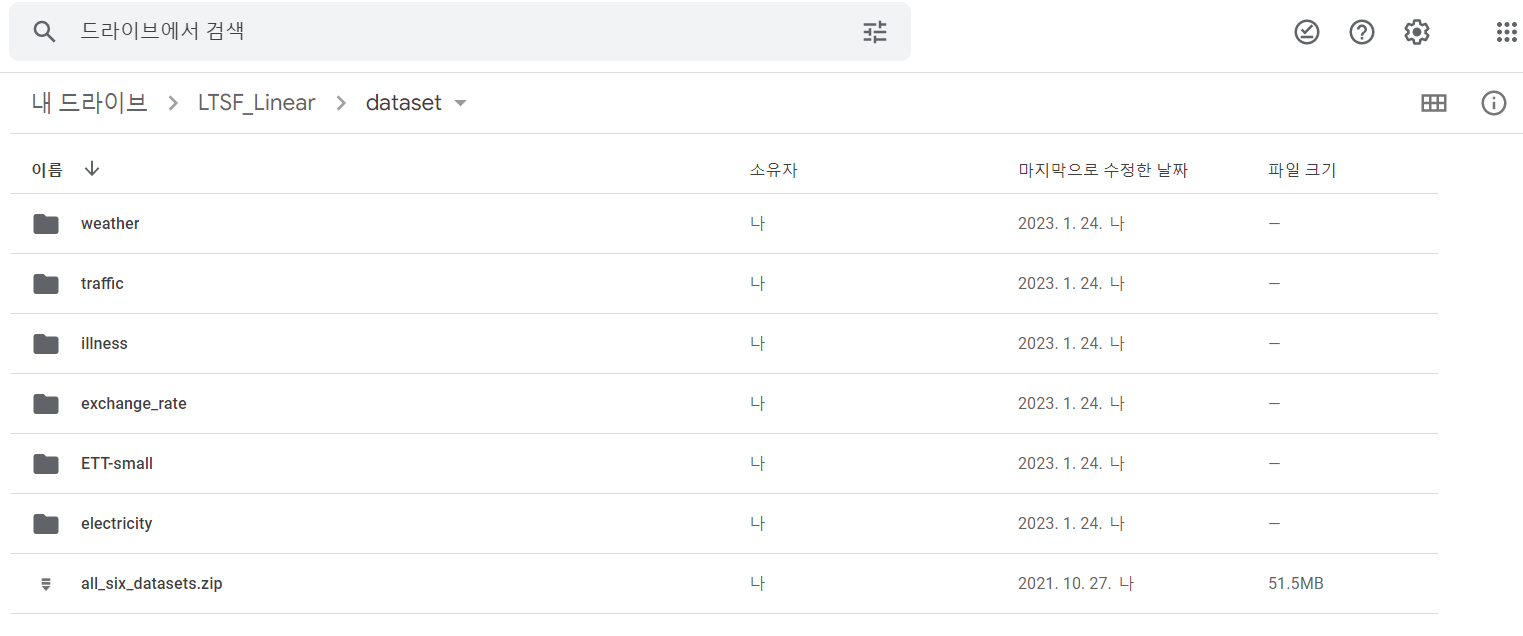

## Training Example
- Model implementation: `scripts/`
- FEDfromer implementation: `FEDformer/scripts/`
- Pyraformer implementation: `Pyraformer/scripts/`

For example:

To train the LTSF-Linear on Exchange-Rate dataset, you can use the scipt `scripts/EXP-LongForecasting/Linear/exchange_rate.sh`:


```
sh scripts/EXP-LongForecasting/Linear/exchange_rate.sh
```

It will start to train DLinear by default, the results will be shown in `logs/LongForecasting`. You can specify the name of the model in the script. (Linear, DLinear, NLinear)



- [how to execute shell script on colab](https://stackoverflow.com/questions/52343308/how-to-run-shell-script-file-on-ipython-at-google-colab)

In [3]:
!bash /scripts/EXP-LongForecasting/Linear/exchange_rate.sh

bash: /scripts/EXP-LongForecasting/Linear/exchange_rate.sh: No such file or directory


# 모델학습_교육자료
- 모듈을 사용하는 예를 Google Colaboratory Notebook 형태 파일 코드로 설명

## Import Modules
- 모델 프로세스를 위한 Python 모듈, 신경망 모델을 위한 torch 모듈 등을 import

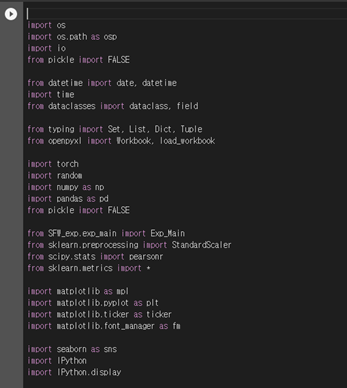

In [4]:
import os
import os.path as osp
import io
from pickle import FALSE

from datetime import date, datetime
import time
from dataclasses import dataclass, field

from typing import Set, List, Dict
from openpyxl import Workbook, load_workbook

import torch
import random
import numpy as np
import pandas as pd
#from pickle import FALSE

from exp.exp_main import Exp_Main # SFW_exp로 표현되어 있지만, exp 폴더를 SFW_exp로 바꾸셨을 것이라고 생각했습니다.
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.metrics import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm

import seaborn as sns
import IPython
import IPython.display

## Module 설명 (p.8)



### data_provider
1. csv 형태의 데이터 파일을 읽어 loading
2. 모델에서 사용되는 변수와 예측항목을 정렬
3. 학습, 검증, 테스트(80%, 10%, 10%)로 구분
4. Input_Sequence, Output_Sequence에 맞게 window를 생성하고 Dataset으로 만들어 모델에 공급

In [5]:
!ls data_provider

data_factory.py  data_loader.py  __init__.py  __pycache__


### exp
1. models.DLinear.py 모듈에 있는 모델의 정의를 불러옴
2. data_provider로부터 Dataset을 받아옴
3. 모델의 학습, 검증, 테스트에 대한 함수 정의
4. 결과에 대한 출력, Best 학습 결과의 checkpoints 및 모델을 저장

In [6]:
!ls exp

exp_basic.py  exp_main.py  exp_stat.py	__pycache__


### models
1. 모델에 대한 구조와 신경망 정의

In [7]:
!ls models

Autoformer.py  Informer.py  NLinear.py	 Stat_models.py
DLinear.py     Linear.py    __pycache__  Transformer.py


### utils
1. data_provider와 exp에 사용되는 시간 표시 및 결과 계산 함수

In [8]:
! ls utils 

masking.py  metrics.py	__pycache__  timefeatures.py  tools.py


### Code 설명 (p.9)

1. 모델에 사용될 데이터의 경로와 파일명을 입력
2. 기타 모델 옵션 및 신경망 파라미터 설정

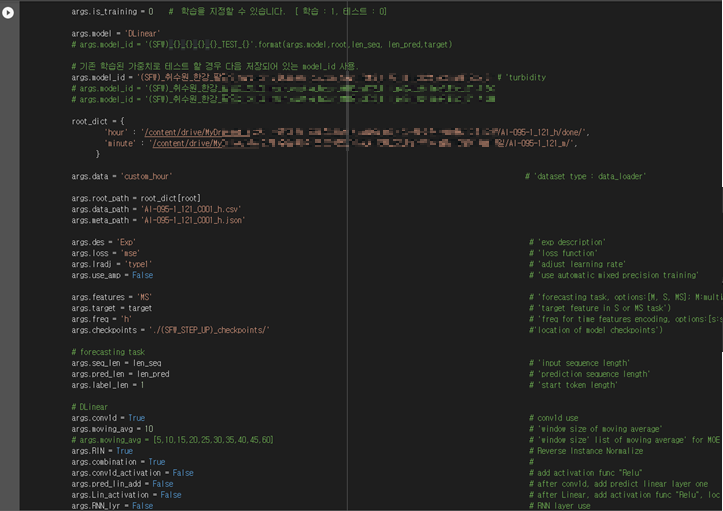

- [introduction-argparse-pt1](https://colab.research.google.com/github/anthony-agbay/introduction-to-python/blob/main/modules/introduction-argparse-pt1/introduction-argparse-pt1.ipynb)

### Code 설명 (p.10)
1. Exp로부터 모델 훈련과 테스트 함수를 불러옴
2. 설정값과 파라미터를 함수에 전달

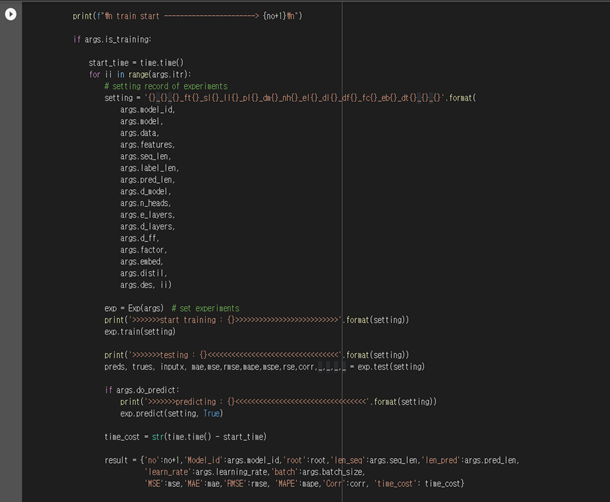

In [9]:
import argparse

args = argparse.Namespace(
    is_training = 1,    
    model_id = 'test',
    model = 'DLinear',

    data = 'ETTm1',
    root_path = './dataset/ETT-small',
    data_path = 'ETTm1.csv',
    features = 'M',
    target = 'OT',
    freq = 'h',
    checkpoints = '_checkpoints/',

    seq_len = 96,
    label_len = 48,
    pred_len = 96,

    individual = False,

    embed_type = 0,
    enc_in = 7,
    dec_in = 7,
    c_out = 7,
    d_model = 512,
    n_heads = 8,
    e_layers = 2,
    d_layers = 1,
    d_ff = 2048,
    moving_avg = 25,
    factor = 1,
    distil = True,
    dropout = 0.05,
    embed = 'timeF',
    activation = 'gelu',
    output_attention = True,
    do_predict = True,

    num_workers = 10,
    itr = 2,
    train_epochs = 10,
    batch_size = 32,
    patience = 3,
    learning_rate = 0.0001,
    des = 'test',
    loss = 'mse',
    lradj = 'type1',
    use_amp = False,

    use_gpu = True,
    gpu = 0,
    use_multi_gpu = False,
    devices = '0,1,2,3',
    test_flop = False)


args.RIN = True                                          # Reverse Instance Normalize
args.combination = True                                  #
args.conv1d_activation = False                           # add activation func "Relu"
args.pred_lin_add = False                                # after conv1d, add predict linear layer one
args.Lin_activation = False                              # after Linear, add activation func "Relu", loc
args.RNN_lyr = False                                     # RNN layer use 


args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.dvices = args.devices.replace(' ', '')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

print('Args in experiment:')
print(args)

Exp = Exp_Main

no = 0
print(f"\n train start ----------------------> {no+1}\n")      

if args.is_training:

    start_time = time.time()
    for ii in range(args.itr):
        # setting record of experiments
        setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
            args.model_id,
            args.model,
            args.data,
            args.features,
            args.seq_len,
            args.label_len,
            args.pred_len,
            args.d_model,
            args.n_heads,
            args.e_layers,
            args.d_layers,
            args.d_ff,
            args.factor,
            args.embed,
            args.distil,
            args.des, ii)

        exp = Exp(args)  # set experiments
        print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
        exp.train(setting)

        print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
        exp.test(setting)

        if args.do_predict:
            print('>>>>>>>predicting : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
            exp.predict(setting, True)

        torch.cuda.empty_cache()
else:
    ii = 0
    setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(args.model_id,
                                                                                                  args.model,
                                                                                                  args.data,
                                                                                                  args.features,
                                                                                                  args.seq_len,
                                                                                                  args.label_len,
                                                                                                  args.pred_len,
                                                                                                  args.d_model,
                                                                                                  args.n_heads,
                                                                                                  args.e_layers,
                                                                                                  args.d_layers,
                                                                                                  args.d_ff,
                                                                                                  args.factor,
                                                                                                  args.embed,
                                                                                                  args.distil,
                                                                                                  args.des, ii)

    exp = Exp(args)  # set experiments
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting, test=1)
    torch.cuda.empty_cache()


Args in experiment:
Namespace(Lin_activation=False, RIN=True, RNN_lyr=False, activation='gelu', batch_size=32, c_out=7, checkpoints='_checkpoints/', combination=True, conv1d_activation=False, d_ff=2048, d_layers=1, d_model=512, data='ETTm1', data_path='ETTm1.csv', dec_in=7, des='test', devices='0,1,2,3', distil=True, do_predict=True, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=1, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=2, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='DLinear', model_id='test', moving_avg=25, n_heads=8, num_workers=10, output_attention=True, patience=3, pred_len=96, pred_lin_add=False, root_path='./dataset/ETT-small', seq_len=96, target='OT', test_flop=False, train_epochs=10, use_amp=False, use_gpu=True, use_multi_gpu=False)

 train start ----------------------> 1

Use GPU: cuda:0
>>>>>>>start training : test_DLinear_ETTm1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_test_0